In [410]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix
%matplotlib inline

In [411]:
dataset = pd.read_csv("diabetes_data_upload.csv")
df=pd.read_csv("diabetes_data_upload.csv")

In [412]:
dataset

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [413]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [414]:
dataset["Gender"] = dataset["Gender"].map({"Male":1,"Female":0})
dataset["class"] = dataset["class"].map({"Positive":1,"Negative":0})
dataset["Polyuria"] = dataset["Polyuria"].map({"Yes":1,"No":0})
dataset["Polydipsia"] = dataset["Polydipsia"].map({"Yes":1,"No":0})
dataset["sudden weight loss"] = dataset["sudden weight loss"].map({"Yes":1,"No":0})
dataset["weakness"] = dataset["weakness"].map({"Yes":1,"No":0})
dataset["Polyphagia"] = dataset["Polyphagia"].map({"Yes":1,"No":0})
dataset["Genital thrush"] = dataset["Genital thrush"].map({"Yes":1,"No":0})
dataset["visual blurring"] = dataset["visual blurring"].map({"Yes":1,"No":0})
dataset["Itching"] = dataset["Itching"].map({"Yes":1,"No":0})
dataset["Irritability"] = dataset["Irritability"].map({"Yes":1,"No":0})
dataset["delayed healing"] = dataset["delayed healing"].map({"Yes":1,"No":0})
dataset["partial paresis"] = dataset["partial paresis"].map({"Yes":1,"No":0})
dataset["muscle stiffness"] = dataset["muscle stiffness"].map({"Yes":1,"No":0})
dataset["Alopecia"] = dataset["Alopecia"].map({"Yes":1,"No":0})
dataset["Obesity"] = dataset["Obesity"].map({"Yes":1,"No":0})

In [415]:
dataset

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [416]:
corrdata = dataset.corr()

In [417]:
X1 = dataset.iloc[:,0:-1]
Y1 = dataset.iloc[:,-1]

In [418]:
X1.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1


In [419]:
Y1.head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

In [420]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
best_feature = SelectKBest(score_func=chi2,k=10)
fit = best_feature.fit(X1,Y1)

dataset_scores = pd.DataFrame(fit.scores_)
dataset_cols = pd.DataFrame(X1.columns)

In [421]:
dataset_scores

,0
0,18.845767
1,38.747637
2,116.184593
3,120.785515
4,57.749309
5,12.724262
6,33.198418
7,4.914009
8,18.124571
9,0.047826


In [422]:
dataset_cols

,0
0,Age
1,Gender
2,Polyuria
3,Polydipsia
4,sudden weight loss
5,weakness
6,Polyphagia
7,Genital thrush
8,visual blurring
9,Itching


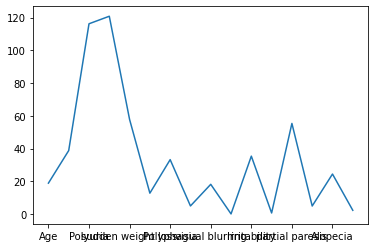

In [423]:
featureview=pd.Series(fit.scores_, index=X1.columns)
featureview.plot()

In [424]:
X= dataset[['Age','sudden weight loss','Polyphagia','Polyuria','Polydipsia','delayed healing', 'visual blurring', 'partial paresis', 'Obesity','weakness']]
X.head()

,Age,sudden weight loss,Polyphagia,Polyuria,Polydipsia,delayed healing,visual blurring,partial paresis,Obesity,weakness
0,40,0,0,0,1,1,0,0,1,1
1,58,0,0,0,0,0,1,1,0,1
2,41,0,1,1,0,1,0,0,0,1
3,45,1,1,0,0,1,0,0,0,1
4,60,1,1,1,1,1,1,1,1,1


In [425]:
y=dataset['class']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

In [426]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=5)

In [427]:
print(x_train)
print(x_test)
print(y_train)
print(y_test)

     Age  sudden weight loss  Polyphagia  ...  partial paresis  Obesity  weakness
122   40                   0           1  ...                1        1         1
9     70                   1           1  ...                0        0         1
285   30                   0           0  ...                0        0         0
458   40                   1           0  ...                1        0         1
186   90                   1           0  ...                0        0         0
..   ...                 ...         ...  ...              ...      ...       ...
8     67                   0           1  ...                1        1         1
73    38                   1           1  ...                1        0         1
400   44                   1           0  ...                0        1         1
118   65                   0           0  ...                1        0         1
206   60                   0           0  ...                1        0         1

[390 rows x 10 

In [428]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [429]:
lg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [430]:
pred =lg.predict(x_test)

In [431]:
pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1])

In [432]:
y_test

223    0
328    0
455    1
71     1
373    0
      ..
157    1
466    0
415    1
208    0
419    1
Name: class, Length: 130, dtype: int64

In [433]:
logistic_regression=accuracy_score(pred,y_test)
print(accuracy_score(pred,y_test))
print(confusion_matrix(pred,y_test))

0.9384615384615385
[[49  4]
 [ 4 73]]


In [434]:
from sklearn.metrics import classification_report
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        53
           1       0.95      0.95      0.95        77

    accuracy                           0.94       130
   macro avg       0.94      0.94      0.94       130
weighted avg       0.94      0.94      0.94       130

